In [2]:
#Imports
import matplotlib.pyplot as plt
from astropy.io import ascii

In [3]:
#Read the data
data = ascii.read('Final_Combined_Data_Accepted.csv')

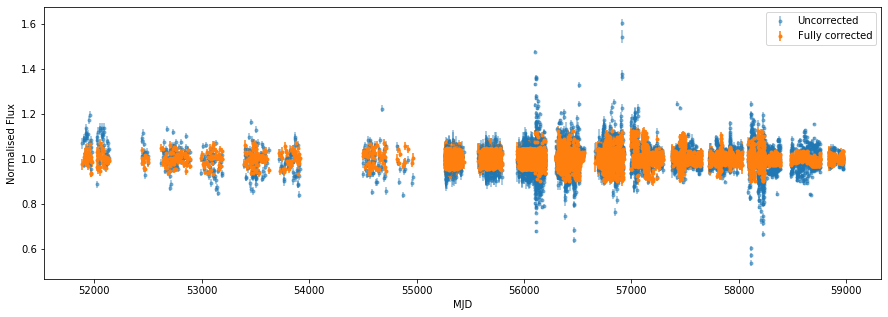

In [4]:
#Plot it up
fig, ax = plt.subplots(1)
ax.errorbar(data['MJD'], data['Non_Corr_Flux'], yerr = data['Eflux'], fmt = '.', alpha = 0.5, label ='Uncorrected')
ax.errorbar(data['MJD'], data['Corr_Flux'], yerr = data['Eflux'], fmt = '.', label = 'Fully corrected')
ax.set_xlabel('MJD')
ax.set_ylabel('Normalised Flux')
ax.legend()
fig.set_size_inches(15, 5)

plt.show()